In [3]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
okt = Okt()
kkma = Kkma()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import re
from collections import Counter

import warnings
warnings.simplefilter("ignore")

from wordcloud import WordCloud
import matplotlib.pyplot as plt


from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# 기초 불용어 처리
from nltk.corpus import stopwords

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer

# 워드 클라우드를 위한 라이브러리
from collections import Counter
# import pytagcloud
from IPython.display import Image

# 저장
import pickle

import json
import ast

In [4]:
opt_df = pd.read_excel(r"C:\Users\NT550009\Desktop\11st\Rate_polar check.xlsx")

In [9]:
opt_df.head() 

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count
0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",비공개,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1
1,3569992365,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",비공개,"['비침도', '크게', '없고', '사이즈', '넉넉해서', '좋습니다', '여름...",2,10,1
2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",비공개,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1
3,3569992365,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",비공개,"['얇아서', '비침이', '있으며', '부드러운', '재질', '입니다', '입기...",1,8,1
4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",비공개,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1


In [10]:
# option, size로 정리하기

In [11]:
# list(opt_df["Size" != 0])

In [12]:
opt_df.iloc[11,6]

0

In [13]:
print(type(opt_df.iloc[11,6]))

<class 'int'>


In [14]:
# 1) 사이즈가 비공개인 경우, 0 으로 바꾸기
# 2) 사이즈 정보를 option 정보와 합치기
opt_df.loc[:,"Size" ].apply(lambda x : 0 if x == "비공개" else x )


0       0
1       0
2       0
3       0
4       0
       ..
7162    0
7163    0
7164    0
7165    0
7166    0
Name: Size, Length: 7167, dtype: object

In [5]:
no_size_df = opt_df[opt_df["Size"] == 0]

In [7]:
no_size_df.to_excel("no_size.xlsx")

In [ ]:
size_df = opt_df[opt_df["Size"]!= 0]

In [16]:
size_df.head()

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count
0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",비공개,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1
1,3569992365,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",비공개,"['비침도', '크게', '없고', '사이즈', '넉넉해서', '좋습니다', '여름...",2,10,1
2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",비공개,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1
3,3569992365,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",비공개,"['얇아서', '비침이', '있으며', '부드러운', '재질', '입니다', '입기...",1,8,1
4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",비공개,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1


In [17]:
size_df.tail()

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count
6981,3596863528,tk2h******,2023.04.30,3,옷이 좀 무거운편이고 착용감은 괜찮습니다.제가 뎃글을 잘못봤는지 105사이즈 입어서...,"Large, Dark Charcoal Heather",비공개,"['무거운', '편이', '착용', '감은', '괜찮습니다', '뎃글', '봤는지'...",0,23,1
6982,3596863528,꽁보리밥,2023.04.15,5,진짜 좋네요 아주아주 좋아요근데 미국 xxl치고 큽니다 기존 US XXL 입던분 한...,"XX-Large, Jet Black",비공개,"['진짜', '좋네요', '아주아주', '좋아요', '근데', '미국', '치고',...",4,13,1
6983,3596863528,gege****,2023.04.26,5,오 역시 좋아요 두번째 구입인데요폴로는 XL를 입는데 이제품은 L지가 조금은 약간은...,"Large, Jet Black",비공개,"['역시', '좋아요', '두번째', '구입', '인데', '폴로', '입는데', ...",2,15,1
6984,3596863528,mw04**,2023.04.23,5,4월20일 주문 했는데 23일에 도착 했네요제품도 세미오버핏으로 잘 맞아요또 구매하...,"Dark Charcoal Heather, Large",비공개,"['월일', '주문', '했는데', '도착', '했네요', '제품', '세미', '...",0,12,1
6985,3596863528,jay5***,2023.04.03,5,"사이즈가 1.5 단계 이상 큰듯 합니다, 기장은 2단계 더 크다고보심이. 참고하세요...","Maroon, Large",비공개,"['사이즈', '단계', '큰듯', '합니다', '기장', '단계', '크다고', ...",2,11,1


In [18]:
size_df["Size"] = size_df["Size" ].apply(lambda x : 0 if x == "비공개" else x )

In [19]:
size_df.head().tail()

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count
0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",0,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1
1,3569992365,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",0,"['비침도', '크게', '없고', '사이즈', '넉넉해서', '좋습니다', '여름...",2,10,1
2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",0,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1
3,3569992365,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",0,"['얇아서', '비침이', '있으며', '부드러운', '재질', '입니다', '입기...",1,8,1
4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",0,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1


In [20]:
size_df[size_df["Size"]!=0]

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count
8,3569992365,jik1***,2023.04.21,5,한국 면티에비에 좀 거친느낌이 있긴 하지만 가성비좋고 막입는용도로 대량규매한다면 추...,0,"3X-Large, White 6-pack, 6","['한국', '면티', '거친', '느낌', '있긴', '가성', '좋고', '입는...",1,13,1
9,3569992365,kwan********,2021.11.24,5,두번째 구매입니다. 엑스라지는 많이 커서 라지로 또 구매,0,"Large, White","['두번째', '구매', '입니다', '엑스', '라지', '많이', '커서', '...",0,9,1
303,3556338225,진소리,2023.04.07,5,편하고 막입기 좋아요운동할때입으니 딱 좋네요봄 가을용 굿,0,"Black (2-pack), X-Large, 2","['편하고', '입기', '좋아요', '운동', '입으니', '좋네요', '가을']",6,7,1
304,3556338225,wooh*****,2021.11.08,5,길단티셔츠는 역시 괜찮네요헤비코튼이 아니라 매우얇고통이 어마어마하게 크니 주의하세요...,0,"Navy (2-pack), 3X-Large","['길단', '티셔츠', '역시', '괜찮네요', '헤비', '코튼', '아니라',...",-2,32,1
309,3556338225,헨리팍,2021.11.09,5,가성비 값색깔 : 화면 그대로에요사이즈 : 훨씬 커요(건조기 돌리면 줄꺼 같아요)마...,0,"Dark Heather (2-pack), X-Large","['가성', '색깔', '화면', '그대로', '에요', '사이즈', '커요', '...",-1,31,1
...,...,...,...,...,...,...,...,...,...,...,...
6947,3627279070,장군이k,2022.08.01,5,옷잘 입고있어요 여름에 실내에서 입으면 딱 좋아요 반팔옷좋음,0,"X-Large, Navy","['입고있어요', '여름', '실내', '입으면', '좋아요', '좋음']",4,6,1
6948,3627279070,seok***,2022.04.07,5,가성비가 좋다는게 이 상품을 두고 하는말이네요,0,"X-Large, Blue, Stripe","['가성', '좋다는게', '상품', '두고', '하는말이네요']",1,5,1
6950,3627279070,seok***,2022.04.07,5,가성비 좋습니다..긴팔도 사야겠어요,0,"X-Large, Grey, Stripe","['가성', '좋습니다', '팔도', '사야겠어요']",3,4,1
6964,3613977935,ㄱㅇㄹ,2023.04.22,3,색감이 좋습니다. 보통 100 사이즈 입는데 팔이 좀 기네요.,0,"Large, Red/Blue, Plaid","['색감', '좋습니다', '보통', '사이즈', '입는데', '팔이', '기네']",2,7,1


In [21]:
# size_df["Size"] 정보가 0 이 아닌 값을 size_df["Option"]에 넣기

temp = size_df[(size_df["Size"] != 0) & (size_df["Option"] == 0)] 
temp

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count
8,3569992365,jik1***,2023.04.21,5,한국 면티에비에 좀 거친느낌이 있긴 하지만 가성비좋고 막입는용도로 대량규매한다면 추...,0,"3X-Large, White 6-pack, 6","['한국', '면티', '거친', '느낌', '있긴', '가성', '좋고', '입는...",1,13,1
9,3569992365,kwan********,2021.11.24,5,두번째 구매입니다. 엑스라지는 많이 커서 라지로 또 구매,0,"Large, White","['두번째', '구매', '입니다', '엑스', '라지', '많이', '커서', '...",0,9,1
303,3556338225,진소리,2023.04.07,5,편하고 막입기 좋아요운동할때입으니 딱 좋네요봄 가을용 굿,0,"Black (2-pack), X-Large, 2","['편하고', '입기', '좋아요', '운동', '입으니', '좋네요', '가을']",6,7,1
304,3556338225,wooh*****,2021.11.08,5,길단티셔츠는 역시 괜찮네요헤비코튼이 아니라 매우얇고통이 어마어마하게 크니 주의하세요...,0,"Navy (2-pack), 3X-Large","['길단', '티셔츠', '역시', '괜찮네요', '헤비', '코튼', '아니라',...",-2,32,1
309,3556338225,헨리팍,2021.11.09,5,가성비 값색깔 : 화면 그대로에요사이즈 : 훨씬 커요(건조기 돌리면 줄꺼 같아요)마...,0,"Dark Heather (2-pack), X-Large","['가성', '색깔', '화면', '그대로', '에요', '사이즈', '커요', '...",-1,31,1
...,...,...,...,...,...,...,...,...,...,...,...
6947,3627279070,장군이k,2022.08.01,5,옷잘 입고있어요 여름에 실내에서 입으면 딱 좋아요 반팔옷좋음,0,"X-Large, Navy","['입고있어요', '여름', '실내', '입으면', '좋아요', '좋음']",4,6,1
6948,3627279070,seok***,2022.04.07,5,가성비가 좋다는게 이 상품을 두고 하는말이네요,0,"X-Large, Blue, Stripe","['가성', '좋다는게', '상품', '두고', '하는말이네요']",1,5,1
6950,3627279070,seok***,2022.04.07,5,가성비 좋습니다..긴팔도 사야겠어요,0,"X-Large, Grey, Stripe","['가성', '좋습니다', '팔도', '사야겠어요']",3,4,1
6964,3613977935,ㄱㅇㄹ,2023.04.22,3,색감이 좋습니다. 보통 100 사이즈 입는데 팔이 좀 기네요.,0,"Large, Red/Blue, Plaid","['색감', '좋습니다', '보통', '사이즈', '입는데', '팔이', '기네']",2,7,1


In [22]:
# 
size_df["Option"] = size_df["Option"].apply(lambda x : size_df["Option"] == size_df["Size"] if x == 0 else x )


In [23]:
size_df = pd.read_excel(r"C:\Users\NT550009\Desktop\11st\size.xlsx")


In [24]:
size_df.head()

,Unnamed: 0,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count
0,0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",0,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1
1,1,3569992365,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",0,"['비침도', '크게', '없고', '사이즈', '넉넉해서', '좋습니다', '여름...",2,10,1
2,2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",0,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1
3,3,3569992365,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",0,"['얇아서', '비침이', '있으며', '부드러운', '재질', '입니다', '입기...",1,8,1
4,4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",0,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1


In [25]:
# Size 정보가 있는 행에 대해 Option에 옮기고 싶음
size_df[size_df["Size"] != 0]

,Unnamed: 0,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count
8,8,3569992365,jik1***,2023.04.21,5,한국 면티에비에 좀 거친느낌이 있긴 하지만 가성비좋고 막입는용도로 대량규매한다면 추...,0,"3X-Large, White 6-pack, 6","['한국', '면티', '거친', '느낌', '있긴', '가성', '좋고', '입는...",1,13,1
9,9,3569992365,kwan********,2021.11.24,5,두번째 구매입니다. 엑스라지는 많이 커서 라지로 또 구매,0,"Large, White","['두번째', '구매', '입니다', '엑스', '라지', '많이', '커서', '...",0,9,1
12,303,3556338225,진소리,2023.04.07,5,편하고 막입기 좋아요운동할때입으니 딱 좋네요봄 가을용 굿,0,"Black (2-pack), X-Large, 2","['편하고', '입기', '좋아요', '운동', '입으니', '좋네요', '가을']",6,7,1
13,304,3556338225,wooh*****,2021.11.08,5,길단티셔츠는 역시 괜찮네요헤비코튼이 아니라 매우얇고통이 어마어마하게 크니 주의하세요...,0,"Navy (2-pack), 3X-Large","['길단', '티셔츠', '역시', '괜찮네요', '헤비', '코튼', '아니라',...",-2,32,1
18,309,3556338225,헨리팍,2021.11.09,5,가성비 값색깔 : 화면 그대로에요사이즈 : 훨씬 커요(건조기 돌리면 줄꺼 같아요)마...,0,"Dark Heather (2-pack), X-Large","['가성', '색깔', '화면', '그대로', '에요', '사이즈', '커요', '...",-1,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1023,6947,3627279070,장군이k,2022.08.01,5,옷잘 입고있어요 여름에 실내에서 입으면 딱 좋아요 반팔옷좋음,0,"X-Large, Navy","['입고있어요', '여름', '실내', '입으면', '좋아요', '좋음']",4,6,1
1024,6948,3627279070,seok***,2022.04.07,5,가성비가 좋다는게 이 상품을 두고 하는말이네요,0,"X-Large, Blue, Stripe","['가성', '좋다는게', '상품', '두고', '하는말이네요']",1,5,1
1026,6950,3627279070,seok***,2022.04.07,5,가성비 좋습니다..긴팔도 사야겠어요,0,"X-Large, Grey, Stripe","['가성', '좋습니다', '팔도', '사야겠어요']",3,4,1
1028,6964,3613977935,ㄱㅇㄹ,2023.04.22,3,색감이 좋습니다. 보통 100 사이즈 입는데 팔이 좀 기네요.,0,"Large, Red/Blue, Plaid","['색감', '좋습니다', '보통', '사이즈', '입는데', '팔이', '기네']",2,7,1


In [26]:
size_df.drop("Unnamed: 0", axis =1, inplace = True)

In [27]:
size_df.head() #Option 5, Size 6

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count
0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",0,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1
1,3569992365,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",0,"['비침도', '크게', '없고', '사이즈', '넉넉해서', '좋습니다', '여름...",2,10,1
2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",0,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1
3,3569992365,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",0,"['얇아서', '비침이', '있으며', '부드러운', '재질', '입니다', '입기...",1,8,1
4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",0,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1


In [28]:
# 사이즈를 입력한 리뷰 모음 size_df 1050개
len(size_df)

1050

In [29]:
size_list = size_df[size_df["Size"] != 0].index

In [30]:
print(size_list)

Int64Index([   8,    9,   12,   13,   18,   24,   25,   26,   29,   34,
            ...
            1012, 1013, 1015, 1020, 1022, 1023, 1024, 1026, 1028, 1032],
           dtype='int64', length=345)


In [31]:
size_df.to_excel("size_simple_index.xlsx")

In [32]:
#Option 5, Size 6
for i in size_list:
    size_df.iloc[i, 5] = size_df.iloc[i, 6]
size_df.head()

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count
0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",0,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1
1,3569992365,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",0,"['비침도', '크게', '없고', '사이즈', '넉넉해서', '좋습니다', '여름...",2,10,1
2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",0,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1
3,3569992365,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",0,"['얇아서', '비침이', '있으며', '부드러운', '재질', '입니다', '입기...",1,8,1
4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",0,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1


In [33]:
size_df.iloc[8, 5]

'3X-Large, White 6-pack, 6'

In [34]:
# size_df.to_excel("size_to_option.xlsx")

PermissionError: [Errno 13] Permission denied: 'size_to_option.xlsx'

In [ ]:
# size, option 모두 기입 안한 경우 6118개
# size 비공개 포함 size, option 입력한 경우 1050
# size 비공개 제외 39개 
# size 1011 개

In [35]:
size_df[(size_df["Size"] == 0) & (size_df["Option"] ==0)]

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count
43,3708667072,hsj2**,2023.02.13,5,넉넉한사이즈에 10장이라서 더욱 더 편안하게 입을수 있을꺼 같아요.사이즈는 표기보다...,0,0,"['넉넉한', '사이즈', '이라서', '더욱', '편안하게', '입을수', '있을...",3,20,1
61,3748242803,psy9***,2023.04.06,5,상품 좋습니다사이즈도 적당하고 봄에 입기엔 딱 좋습니다,0,0,"['상품', '좋습니다', '사이즈', '적당하고', '입기엔', '좋습니다']",4,6,1
104,5502719701,Person1992,2022.03.06,5,빠른배송과 좋은제품 좋은가격 모두 만족합니다.재구매의사 있습니다!,0,0,"['빠른', '배송', '좋은', '제품', '좋은', '가격', '만족합니다', ...",6,10,1
179,4424902341,ETNA,2022.03.19,5,으...몰랐는데 기모였어요!그래도 제품 질은 좋습니다.,0,0,"['몰랐는데', '기모', '였어요', '제품', '좋습니다']",2,5,1
238,3771573417,쇼퍼토끼,2022.09.22,5,돼지신랑 원픽 ...편하고 좋다하네요가격도 저렴하고 소재 좋아요 한국에서 빅사이즈 ...,0,0,"['돼지', '신랑', '원픽', '편하고', '좋다하네요', '가격', '저렴하고...",6,21,1
262,5562175168,vclo***,2022.03.25,5,빠르게 도착했어요~~,0,0,"['빠르게', '도착']",2,2,1
313,5748299160,jiho******,2023.04.22,5,좋아하는 DKNY 질감도 핏도 만족해요,0,0,"['좋아하는', '질감', '만족해요']",2,3,1
318,5748299160,kdre****,2023.04.20,5,가격 저렴하고 품질코 좋고 강추입니다,0,0,"['가격', '저렴하고', '품질', '좋고', '강추', '입니다']",6,6,1
328,5497229714,청년공학의꿈,2023.04.29,5,"사이즈 한국에서 110~115 입는데, 이것은 XL가 잘 맞습니다조금 여유 있게 입...",0,0,"['사이즈', '한국', '입는데', '맞습니다', '여유', '있게', '입고',...",10,43,1
330,5497229714,sunn****,2023.02.27,4,살짝 마른 체형에 올챙이배에요 ㅎM사이즈이고 아시안 L 이라고 표기되어 있습니다.좀...,0,0,"['살짝', '마른', '체형', '올챙이', '에요', '사이즈', '이고', '...",1,26,1


In [36]:
len(size_df[(size_df["Size"] == 0) & (size_df["Option"] ==0)])

39

In [37]:
size_df[(size_df["Size"] == 0) & (size_df["Option"] ==0)].index

Int64Index([ 43,  61, 104, 179, 238, 262, 313, 318, 328, 330, 331, 332, 372,
            466, 467, 522, 523, 550, 552, 553, 554, 628, 640, 681, 821, 823,
            834, 836, 837, 838, 936, 942, 944, 945, 946, 957, 958, 960, 981],
           dtype='int64')

In [38]:
delete = list(size_df[(size_df["Size"] == 0) & (size_df["Option"] ==0)].index)

In [39]:
# option 정보가 기입된 size_df
size_df = size_df.drop(index = delete)

In [ ]:
size_df

In [ ]:
size_df.to_excel("option.xlsx")

In [ ]:
# 667개

# Size : Small, Medium, Large, X-Large, XX-Large, 

In [40]:
size_df["Option_Size"] = ""

In [41]:
size_df.head()

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count,Option_Size
0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",0,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1,
1,3569992365,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",0,"['비침도', '크게', '없고', '사이즈', '넉넉해서', '좋습니다', '여름...",2,10,1,
2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",0,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1,
3,3569992365,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",0,"['얇아서', '비침이', '있으며', '부드러운', '재질', '입니다', '입기...",1,8,1,
4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",0,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1,


In [ ]:
import re

sizes = []
pattern = r'\b(\d{1,2}[XSLM]{0,3}(-\d{1,2}[XSLM]{0,3})?)\b'

for item in data:
    matches = re.findall(pattern, item)
    if matches:
        size = matches[0][0]
        sizes.append(size)
        
print(sizes)

In [52]:
# Option에서 사이즈 정보만 뽑아오기
data = size_df["Option"]
sizes = []
def find_size(x):    
    pattern = r'\b(\d{1,2}[XSLM]{0,3}(-\d{1,2}[XSLM]{0,3})?)\b'   
    matches = re.findall(pattern, x)
    if matches:
        size = matches[0][0]
        return size 
    
    
def find_size_re(x):     
    pattern = r'\b(2X-Large|3X-Large|X-Large|XX-Large|Small|Medium|Large|3X|4X)\b'

    matches = re.findall(pattern, x)
    if matches:
        size = matches[0]
        return size

In [ ]:
print(size_df.iloc[0,5])
print(type(size_df.iloc[0,5]))

In [ ]:
find_size(size_df.iloc[0,5])

In [43]:
find_size_re(size_df.iloc[0,5])
print(find_size_re(size_df.iloc[0,5]))

Medium


In [53]:
size_df["Option_Size"] = size_df["Option"].apply(lambda x : find_size_re(x) )

In [54]:
size_df.tail()

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count,Option_Size
1045,3596863528,tk2h******,2023.04.30,3,옷이 좀 무거운편이고 착용감은 괜찮습니다.제가 뎃글을 잘못봤는지 105사이즈 입어서...,"Large, Dark Charcoal Heather",0,"['무거운', '편이', '착용', '감은', '괜찮습니다', '뎃글', '봤는지'...",0,23,1,Large
1046,3596863528,꽁보리밥,2023.04.15,5,진짜 좋네요 아주아주 좋아요근데 미국 xxl치고 큽니다 기존 US XXL 입던분 한...,"XX-Large, Jet Black",0,"['진짜', '좋네요', '아주아주', '좋아요', '근데', '미국', '치고',...",4,13,1,XX-Large
1047,3596863528,gege****,2023.04.26,5,오 역시 좋아요 두번째 구입인데요폴로는 XL를 입는데 이제품은 L지가 조금은 약간은...,"Large, Jet Black",0,"['역시', '좋아요', '두번째', '구입', '인데', '폴로', '입는데', ...",2,15,1,Large
1048,3596863528,mw04**,2023.04.23,5,4월20일 주문 했는데 23일에 도착 했네요제품도 세미오버핏으로 잘 맞아요또 구매하...,"Dark Charcoal Heather, Large",0,"['월일', '주문', '했는데', '도착', '했네요', '제품', '세미', '...",0,12,1,Large
1049,3596863528,jay5***,2023.04.03,5,"사이즈가 1.5 단계 이상 큰듯 합니다, 기장은 2단계 더 크다고보심이. 참고하세요...","Maroon, Large",0,"['사이즈', '단계', '큰듯', '합니다', '기장', '단계', '크다고', ...",2,11,1,Large


In [55]:
size_list = (2X-Large,3X-Large,X-Large,XX-Large,Small,Medium,Large)

SyntaxError: invalid decimal literal (1874408606.py, line 1)

In [57]:
size_df.to_excel("Option_Size_check_1.xlsx")

In [61]:
size_df.iloc[264,11]
print(type(size_df.iloc[264,11]))

<class 'NoneType'>


In [65]:
size_df[size_df["Option_Size"].isnull()]

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count,Option_Size
268,3536870573,ztzt****,2021.09.27,5,옷 마감도 괜찮고 싸게 잘 산거 같아요,"18.5"" Neck 36""-37"" Sleeve, Black","18.5"" Neck 36""-37"" Sleeve, Black","['마감', '괜찮고', '싸게', '산거', '같아요']",3,5,1,None
269,3536870573,bbob**************,2021.10.24,3,마감이 허술하고 어설퍼요싸그려 제품같아요,"18"" Neck 34""-35"" Sleeve, Deep Sea","18"" Neck 34""-35"" Sleeve, Deep Sea","['마감', '하고', '어설퍼요', '그려', '제품', '같아요']",0,6,1,None
270,3536870573,bbob**************,2021.10.24,3,그냥 그래요,"18"" Neck 34""-35"" Sleeve, Dark Leaf","18"" Neck 34""-35"" Sleeve, Dark Leaf","['그냥', '그래요']",0,2,1,None
324,3560475809,thez*****,2022.08.24,3,포장이 엉망입니다 ㅜㅜ,"17, Coastal Purple","17, Coastal Purple","['포장', '엉망', '입니다', 'ㅜㅜ']",0,4,1,None
325,3560475809,thez*****,2022.08.31,5,좋아요 감사합니다 선생님,"17, Light Blue","17, Light Blue","['좋아요', '감사합니다', '선생님']",2,3,1,None
326,3560475809,thez*****,2022.06.19,5,감사합니다 조금 커요,"17, Light Blue","17, Light Blue","['감사합니다', '커요']",0,2,1,None
462,3585177700,수줍냥,2022.04.15,3,사실 아마존 치수를 정확히 알고자 싼 제품 찾아 구매해 본거라 큰 기대가 없었음.역...,"Light Blue, 15""-15.5"" Neck 34""-35"" Sleeve",0,"['사실', '아마존', '치수', '정확히', '알고자', '제품', '찾아', ...",3,22,1,None
954,5532758103,베리베리썬,2022.09.05,4,"팔,다리가 좀 길지만 옷은 예뻐요~약기모 제품입니다~","7, Pitch Gray",0,"['다리', '예뻐요', '기모', '제품', '입니다']",0,5,1,None


In [66]:
null_rows = size_df[size_df["Option_Size"].isnull()]

In [71]:
size_df[size_df["Option_Size"].isnull()].index

Int64Index([268, 269, 270, 324, 325, 326, 462, 954], dtype='int64')

In [75]:
size_df.head()

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count,Option_Size
0,3569992365,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",0,"['쿠폰', '써서', '정도', '벌이', '정말', '싸요', '싼만큼', '마...",2,18,1,Medium
1,3569992365,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",0,"['비침도', '크게', '없고', '사이즈', '넉넉해서', '좋습니다', '여름...",2,10,1,XX-Large
2,3569992365,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",0,"['알려진', '브랜드', '입니다면이', '얇고', '줄기', '합니다', '여름...",2,13,1,X-Large
3,3569992365,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",0,"['얇아서', '비침이', '있으며', '부드러운', '재질', '입니다', '입기...",1,8,1,Large
4,3569992365,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",0,"['저렴하게', '입기', '좋네요', '생각', '보다', '정사', '이즈', ...",2,20,1,Medium


In [77]:
size_df.columns

Index(['ProductNum', 'ID', 'Date', 'Grade', 'Text', 'Option', 'Size',
       'FilteredText', 'Rate', 'FilteredLen', 'count', 'Option_Size'],
      dtype='object')

In [78]:
temp_size_df = size_df.reset_index()

In [79]:
temp_size_df.tail()

,index,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count,Option_Size
1006,1045,3596863528,tk2h******,2023.04.30,3,옷이 좀 무거운편이고 착용감은 괜찮습니다.제가 뎃글을 잘못봤는지 105사이즈 입어서...,"Large, Dark Charcoal Heather",0,"['무거운', '편이', '착용', '감은', '괜찮습니다', '뎃글', '봤는지'...",0,23,1,Large
1007,1046,3596863528,꽁보리밥,2023.04.15,5,진짜 좋네요 아주아주 좋아요근데 미국 xxl치고 큽니다 기존 US XXL 입던분 한...,"XX-Large, Jet Black",0,"['진짜', '좋네요', '아주아주', '좋아요', '근데', '미국', '치고',...",4,13,1,XX-Large
1008,1047,3596863528,gege****,2023.04.26,5,오 역시 좋아요 두번째 구입인데요폴로는 XL를 입는데 이제품은 L지가 조금은 약간은...,"Large, Jet Black",0,"['역시', '좋아요', '두번째', '구입', '인데', '폴로', '입는데', ...",2,15,1,Large
1009,1048,3596863528,mw04**,2023.04.23,5,4월20일 주문 했는데 23일에 도착 했네요제품도 세미오버핏으로 잘 맞아요또 구매하...,"Dark Charcoal Heather, Large",0,"['월일', '주문', '했는데', '도착', '했네요', '제품', '세미', '...",0,12,1,Large
1010,1049,3596863528,jay5***,2023.04.03,5,"사이즈가 1.5 단계 이상 큰듯 합니다, 기장은 2단계 더 크다고보심이. 참고하세요...","Maroon, Large",0,"['사이즈', '단계', '큰듯', '합니다', '기장', '단계', '크다고', ...",2,11,1,Large


In [83]:
size_df = temp_size_df.drop("index", axis = 1)

In [87]:
size_df[size_df["Option_Size"].isnull()]

,ProductNum,ID,Date,Grade,Text,Option,Size,FilteredText,Rate,FilteredLen,count,Option_Size
262,3536870573,ztzt****,2021.09.27,5,옷 마감도 괜찮고 싸게 잘 산거 같아요,"18.5"" Neck 36""-37"" Sleeve, Black","18.5"" Neck 36""-37"" Sleeve, Black","['마감', '괜찮고', '싸게', '산거', '같아요']",3,5,1,None
263,3536870573,bbob**************,2021.10.24,3,마감이 허술하고 어설퍼요싸그려 제품같아요,"18"" Neck 34""-35"" Sleeve, Deep Sea","18"" Neck 34""-35"" Sleeve, Deep Sea","['마감', '하고', '어설퍼요', '그려', '제품', '같아요']",0,6,1,None
264,3536870573,bbob**************,2021.10.24,3,그냥 그래요,"18"" Neck 34""-35"" Sleeve, Dark Leaf","18"" Neck 34""-35"" Sleeve, Dark Leaf","['그냥', '그래요']",0,2,1,None
316,3560475809,thez*****,2022.08.24,3,포장이 엉망입니다 ㅜㅜ,"17, Coastal Purple","17, Coastal Purple","['포장', '엉망', '입니다', 'ㅜㅜ']",0,4,1,None
317,3560475809,thez*****,2022.08.31,5,좋아요 감사합니다 선생님,"17, Light Blue","17, Light Blue","['좋아요', '감사합니다', '선생님']",2,3,1,None
318,3560475809,thez*****,2022.06.19,5,감사합니다 조금 커요,"17, Light Blue","17, Light Blue","['감사합니다', '커요']",0,2,1,None
449,3585177700,수줍냥,2022.04.15,3,사실 아마존 치수를 정확히 알고자 싼 제품 찾아 구매해 본거라 큰 기대가 없었음.역...,"Light Blue, 15""-15.5"" Neck 34""-35"" Sleeve",0,"['사실', '아마존', '치수', '정확히', '알고자', '제품', '찾아', ...",3,22,1,None
919,5532758103,베리베리썬,2022.09.05,4,"팔,다리가 좀 길지만 옷은 예뻐요~약기모 제품입니다~","7, Pitch Gray",0,"['다리', '예뻐요', '기모', '제품', '입니다']",0,5,1,None


In [84]:
size_df[size_df["Option_Size"].isnull()].index

Int64Index([262, 263, 264, 316, 317, 318, 449, 919], dtype='int64')

In [88]:
size_df.iloc[262,11] = '18.5" Neck 36"-37" Sleeve'

In [89]:
size_df.iloc[262,11]

'18.5" Neck 36"-37" Sleeve'

In [91]:
size_df.iloc[263,11] = '18" Neck 34"-35" Sleeve'

In [92]:
size_df.iloc[264,11] = '18" Neck 34"-35" Sleeve'

In [93]:
size_df.iloc[316,11] = "17"

In [94]:
size_df.iloc[317,11] = "17"

In [95]:
size_df.iloc[318,11] = "17"

In [96]:
size_df.iloc[449,11] = '15"-15.5" Neck 34"-35" Sleeve'

In [100]:
size_df.iloc[919,11] = '7'

In [98]:
size_df.iloc[449,4]

'사실 아마존 치수를 정확히 알고자 싼 제품 찾아 구매해 본거라 큰 기대가 없었음.역시나 드레스 셔츠는 그냥 국내 제품이 좋을 것 같네요.팔에 얼룩도 ？어 있네요.ㅋ'

In [102]:
size_df.to_excel("size_final.xlsx")

In [106]:
size_array = size_df["Option_Size"].unique()

In [111]:
size_df["Option_Size"].value_counts()

Medium                           243
Large                            216
X-Large                          203
XX-Large                         171
Small                             99
3X-Large                          56
4X                                13
17                                 3
18" Neck 34"-35" Sleeve            2
3X                                 2
18.5" Neck 36"-37" Sleeve          1
15"-15.5" Neck 34"-35" Sleeve      1
7                                  1
Name: Option_Size, dtype: int64

In [109]:
size_counts = size_df["Option_Size"].value_counts()

<Axes: >

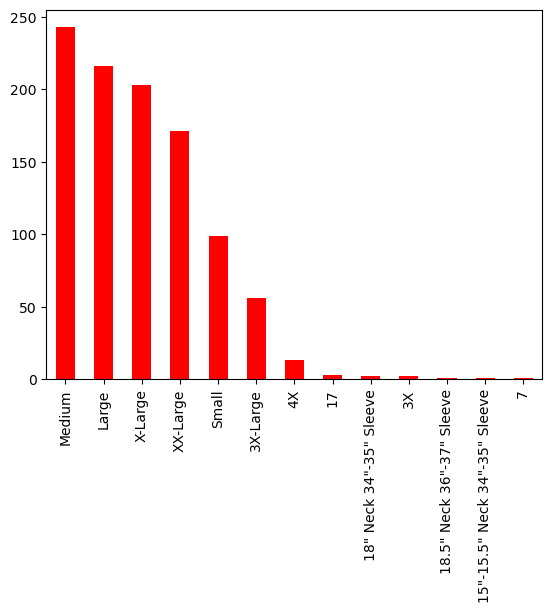

In [112]:
size_counts.plot(kind = 'bar', color = 'red')